### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. 
 -   /datasets/orders_info_short.csv. 
 -   /datasets/costs_info_short.csv.

In [1]:
#импорт библиотек для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from scipy import stats as st

In [2]:
#cнизим размерность чисел для вывода на экран на всем проекте
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# загрузка датасета
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

Рассмотрим содержимое датасетов.

In [4]:
display(visits.head(5))
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
display(orders.head(5))
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
display(costs.head(5))
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Есть проблемы с названиями столбцов - необходимо привести их к нижнему регистру и избавиться от пробелов в названиях.<br>
Так же необходимо привести к формату datetime столбцы с датами в датафреймах.

In [7]:
#приводим названия столбцов к нижнему регистру
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

In [8]:
#приведение дат к формату datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt']= pd.to_datetime(costs['dt']).dt.date


In [9]:
#избавимся от явных дубликатов
visits = visits.drop_duplicates()
orders = orders.drop_duplicates()
costs = costs.drop_duplicates()

In [10]:
display(visits.head(5))
visits.info()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
Int64Index: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 16.6+ MB


In [11]:
display(orders.head(5))
orders.info()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


In [12]:
display(costs.head(5))
costs.info()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 56.2+ KB


**Выводы:**
- загружены библиотеки необходимые для работы и датасеты из для анализа;
- названия колонок приведены к нижнему регистру и из названий удалены пробелы;
- форматы колонок с датами приведены к формату datetime;
- удалены явные дубликаты, явных дубликатов в датасетах не выявлены.

# Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [13]:
def get_profiles(sessions, orders, ad_costs): # events, event_names=[]

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
        #if event in events['event_name'].unique():
            #profiles[event] = profiles['user_id'].isin(
                #events.query('event_name == @event')['user_id'].unique()
            #)

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [17]:
#функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [18]:
# функция для визуализации удержания и динамики удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации возврата инвестиций
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Выводы:**
- заданы функции для расчета метрик и построения графиков.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Хорошо, все необходимые функции были заданы, можно приступать к расчетам и анализу👀

# Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [21]:
#получим датафрейм с профилями пользователей используя функцию get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


In [22]:
#определим минимальную и максимальную дату привлечения пользователей
print('Минимальная дата привлечения:', profiles['first_ts'].min())
print('Максимальная дата привлечения:', profiles['first_ts'].max())

Минимальная дата привлечения: 2019-05-01 00:00:41
Максимальная дата привлечения: 2019-10-27 23:59:04


In [23]:
#страны пользователей и какие дают больше всего платящих пользователей
(
    profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
    .reset_index().rename(columns={'count':'all_users','sum':'paying_user', 'mean':'%_of_paying'})
    .droplevel(1, axis=1).sort_values(by='%_of_paying',ascending=False).style.format({'%_of_paying':'{:.2%}'})
)

,region,all_users,paying_user,%_of_paying
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


C большим отрывом количество платящих пользователей находятся в США.

In [24]:
#устройства и какими из них чаще всего пользуются
(
    profiles.pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
    .reset_index().rename(columns={'count':'all_users','sum':'paying_user', 'mean':'%_of_paying'})
    .droplevel(1, axis=1).sort_values(by='%_of_paying',ascending=False).style.format({'%_of_paying':'{:.2%}'})
)

,device,all_users,paying_user,%_of_paying
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


С точки зрения устройств такого отрыва нет, наибольшее количество платящих пользователей пользуются Айфонами, у других устройств практически паритет, на последнем месте находятся пользователи ПК.

In [25]:
#каналы привлечения и количество пользователей
(
    profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
    .reset_index().rename(columns={'count':'all_users','sum':'paying_user', 'mean':'%_of_paying'})
    .droplevel(1, axis=1).sort_values(by='%_of_paying',ascending=False).style.format({'%_of_paying':'{:.2%}'})
)

,channel,all_users,paying_user,%_of_paying
1,FaceBoom,29144,3557,12.20%
0,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%
6,TipTop,19561,1878,9.60%
5,RocketSuperAds,4448,352,7.91%
7,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%


Лучшим каналом с точки зрения платящих пользователей является FaceBoom. Пришедшие органически находятся на последнем месте.

**Вывод:**
- с большим отрывом количество платящих пользователей находятся в США;
- с точки зрения устройств такого отрыва нет, наибольшее количество платящих пользователей пользуются Айфонами, у других устройств практически паритет, на последнем месте находятся пользователи ПК;
- лучшим каналом с точки зрения платящих пользователей является FaceBoom. Пришедшие органически находятся на последнем месте.

# Шаг 4. Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [26]:
print(f'Потратили всего: {profiles["acquisition_cost"].sum().astype(int):.0f}')
print('')
print('Потратили на каждый источник:')
print(profiles.groupby('channel')['acquisition_cost'].sum().astype(int).sort_values(ascending=False))
print('')
print('Потратили по времени:')
print(profiles.groupby('month')['acquisition_cost'].sum().astype(int))

Потратили всего: 105497

Потратили на каждый источник:
channel
TipTop                54751
FaceBoom              32445
WahooNetBanner         5151
AdNonSense             3911
OppleCreativeMedia     2151
RocketSuperAds         1833
LeapBob                1797
lambdaMediaAds         1557
MediaTornado            954
YRabbit                 944
organic                   0
Name: acquisition_cost, dtype: int64

Потратили по времени:
month
2019-05-01     9978
2019-06-01    15090
2019-07-01    16447
2019-08-01    20657
2019-09-01    22441
2019-10-01    20882
Name: acquisition_cost, dtype: int64


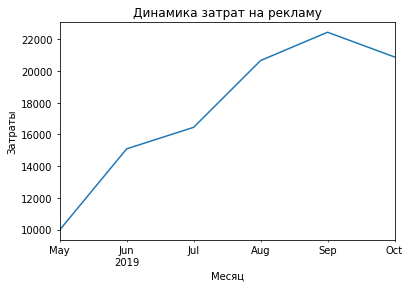

In [27]:
#построение графика расходов на рекламу
(
    profiles.groupby('month')['acquisition_cost'].sum()
    .plot(ylabel='Затраты', xlabel='Месяц', title='Динамика затрат на рекламу')
)
plt.show;

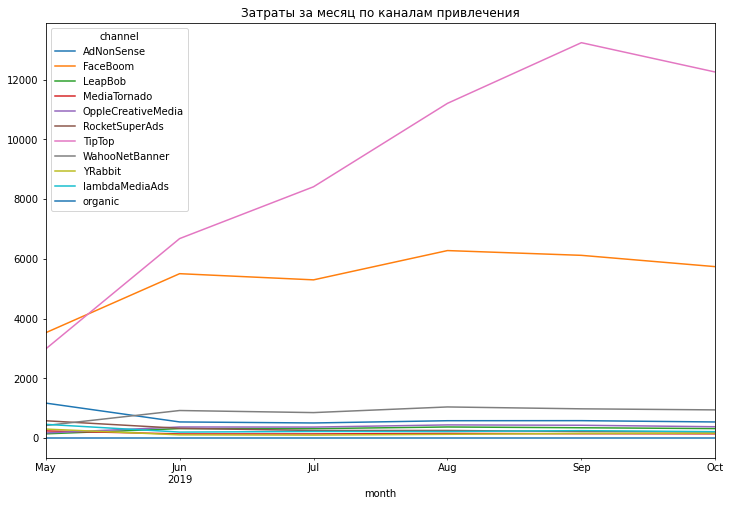

In [28]:
(
    profiles.pivot_table(index='channel', columns='month', values='acquisition_cost',aggfunc='sum')
    .T.plot(figsize=(12,8), title='Затраты за месяц по каналам привлечения')
);

In [29]:
print('Стоимиость привлечения покупателя в зависимости от источника:')
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

Стоимиость привлечения покупателя в зависимости от источника:


channel
TipTop               2.80
FaceBoom             1.11
AdNonSense           1.01
lambdaMediaAds       0.72
WahooNetBanner       0.60
RocketSuperAds       0.41
OppleCreativeMedia   0.25
YRabbit              0.22
MediaTornado         0.22
LeapBob              0.21
organic              0.00
Name: acquisition_cost, dtype: float64

**Вывод:**
- общие траты на рекламу составили 105497 у.е.;
- с большим отрывом больше всего денег в качестве источника продвижения потратили на TipTop, он же явился и самым дорогим с точки зрения затрат на привлечение 1 покупателя. В 1,5 раза меньше затратили на FaceBoom, при этом стоимость затрат на пользователя близка к медиане. На остальные источники затратили от ~1000 до ~5000, стоимость привленчения 1 покупателя составила около 9.
- по времени вложений, наибольшие затраты на рекламу осуществляются в последние 3 месяца. Меньше всего вкладывали в рекламу в начале представленного датасета, в мае.

# Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Проанализируйте общую окупаемость рекламы

Применим функции для получения данных LTV, CAC и ROI, а так же функции для построения графиков по ним.

In [30]:
observation_date = profiles['first_ts'].max()
horizon = 7
non_organic_profiles=profiles[profiles['channel']!='organic']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv (non_organic_profiles, orders,observation_date, 
                                              horizon,dimensions=[], ignore_horizon=False)
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0
cohort,,,,,,,,,
All users,89845,1.12,0.31,0.39,0.45,0.50,0.55,0.58,0.62


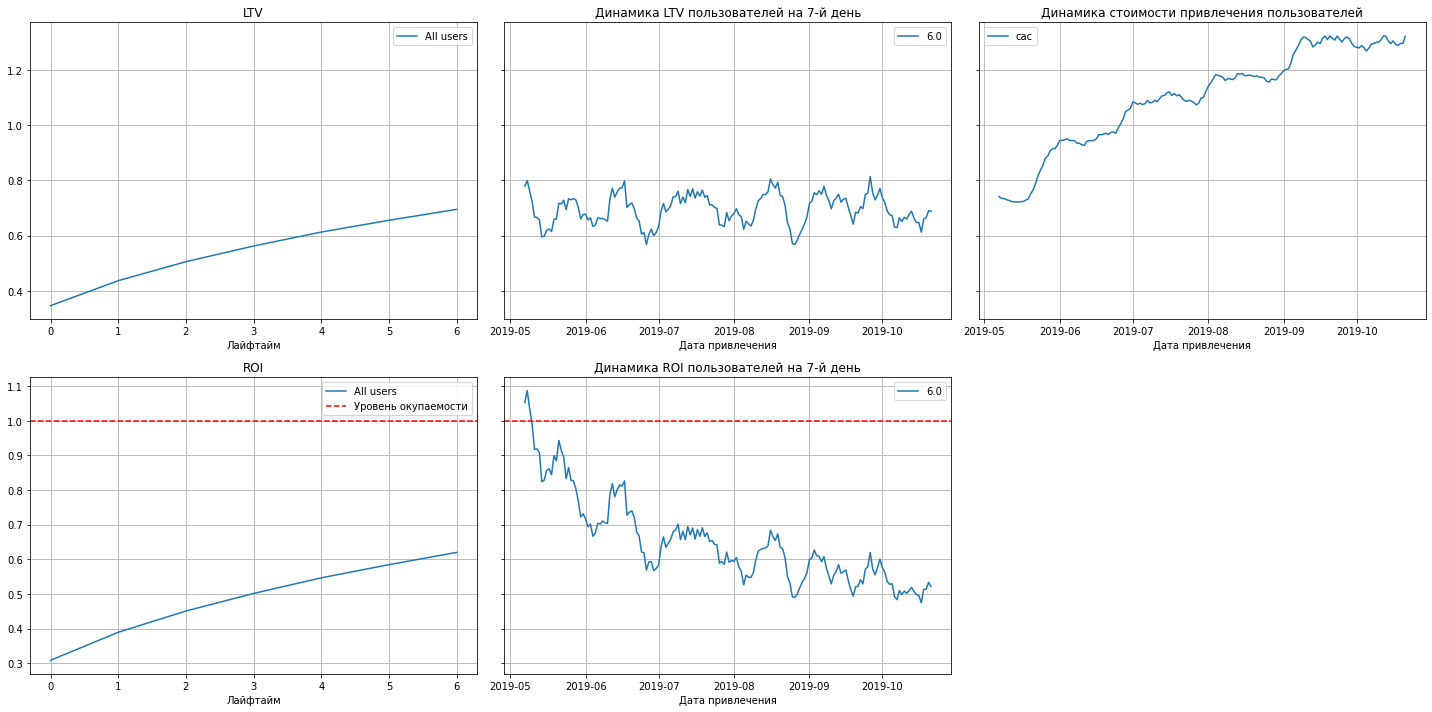

In [31]:
plot_ltv_roi (ltv, ltv_history, roi, roi_history, horizon, window=7)

**Вывод:**
- ROI  ни разу за весь период не достигал 1, инвестиции в рекламу не окупаются, отметим постоянный рост затрат отметим с самого начала отчета и если ROI на 7-й день был хоть немного положительным и было от чего отталкиваться, то дальше - пропасть.

### Проанализируйте окупаемость рекламы с разбивкой по устройствам

Применим функции для получения данных LTV, CAC и ROI с разбивкой по устройствам, а так же функции для построения графиков по ним.

In [32]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv (non_organic_profiles, orders,observation_date, 
                                              horizon,dimensions=['device'], ignore_horizon=False)
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0
device,,,,,,,,,
Android,20969,1.02,0.33,0.42,0.49,0.54,0.59,0.64,0.68
Mac,17991,1.28,0.30,0.38,0.43,0.47,0.51,0.54,0.57
PC,18371,0.79,0.35,0.46,0.55,0.62,0.69,0.74,0.80
iPhone,32514,1.28,0.29,0.36,0.41,0.46,0.50,0.53,0.56


In [33]:
#функция для сглаживания фрейма
ltv_history = filter_data(ltv_history, window=14)
roi_history = filter_data(roi_history, window=14)

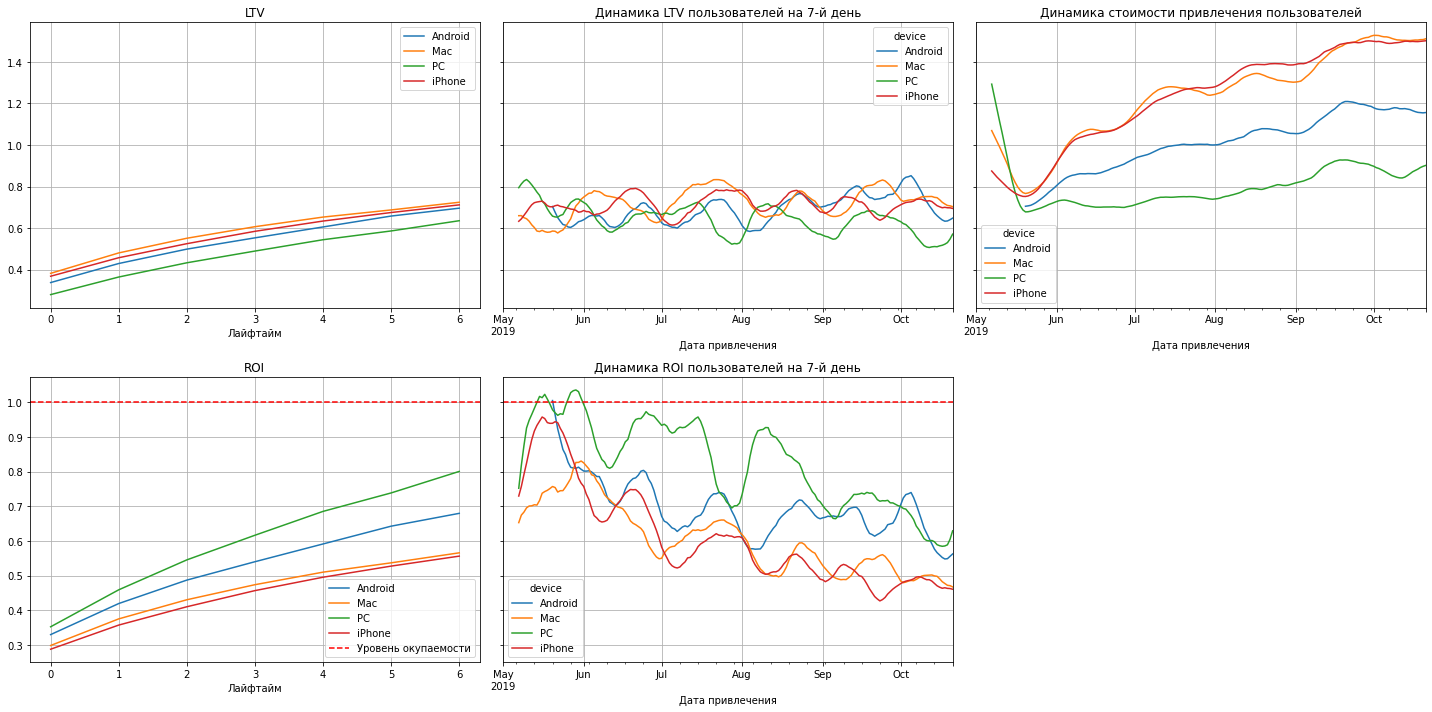

In [34]:
plot_ltv_roi (ltv, ltv_history, roi, roi_history, horizon, window=7)

**Вывод:**
- наибольшая стоимость привлечения, как и LTV наблюдается у пользователей iOS/MacOS, но затраты на привлечение все же несоизмеримо больше, что дает худшую окупаемость среди устройств.
- меньше всего вклыдываются в привлечение пользователей PC, при этом окупаемость самая высокая. С учетом базы пользователей, стоит больше внимания уделить привлечению платящей аудитории данной платформы.

### Проанализируйте окупаемость рекламы с разбивкой по странам

In [35]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv (non_organic_profiles, orders,observation_date, 
                                              horizon,dimensions=['region'], ignore_horizon=False)
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0
region,,,,,,,,,
France,10646,0.46,0.42,0.56,0.67,0.78,0.88,0.97,1.04
Germany,9135,0.46,0.40,0.56,0.71,0.81,0.91,0.99,1.07
UK,10684,0.45,0.48,0.65,0.81,0.92,1.03,1.11,1.23
United States,59380,1.46,0.29,0.36,0.41,0.45,0.48,0.51,0.54


In [36]:
#функция для сглаживания фрейма
ltv_history = filter_data(ltv_history, window=14)
roi_history = filter_data(roi_history, window=14)

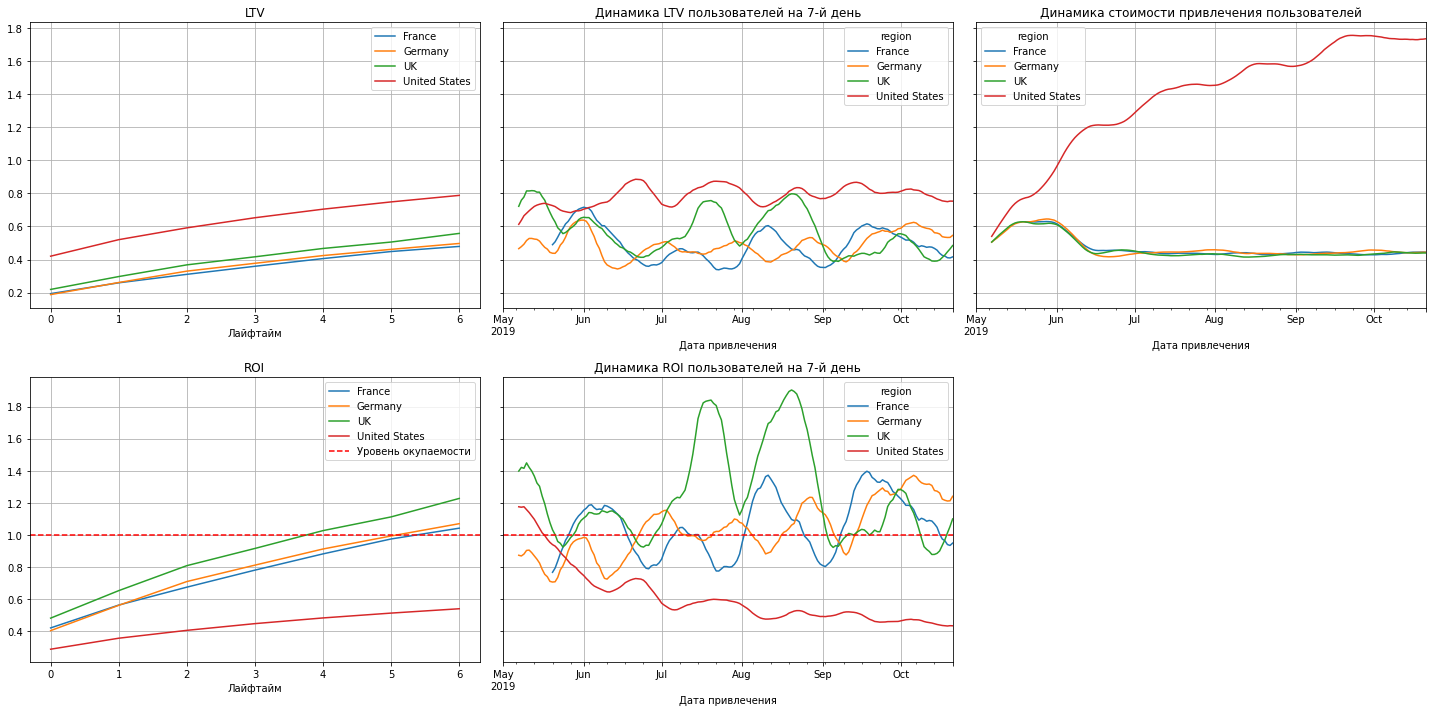

In [37]:
plot_ltv_roi (ltv, ltv_history, roi, roi_history, horizon, window=7)

**Вывод:**
- основные затраты на рекламу связаны с США, что, в целом, логично, в данном регионе наибольшее количество активных пользователей. Однако данные инвестиции в страну не окупаются, необходимо пересматривать рекламные бюджеты и их реализацию; 
- европейские страны показывают схожие показатели, лучшей по LTV и ROI является Британия, если есть какие то особенности продвижения на данном рынке, стоит обратить на них внимание и реализовать в остальных регионах.
- Франция хоть и находится на последнем месте по LTV, однако доходность вложений в рекламу выше 1.

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам

In [38]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv (non_organic_profiles, orders,observation_date, 
                                              horizon,dimensions=['channel'], ignore_horizon=False)
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0
channel,,,,,,,,,
AdNonSense,3739,1.01,0.50,0.59,0.64,0.68,0.70,0.73,0.75
FaceBoom,27932,1.11,0.53,0.59,0.63,0.66,0.67,0.68,0.70
LeapBob,8192,0.21,0.52,0.75,0.99,1.13,1.25,1.39,1.51
MediaTornado,4222,0.22,0.63,0.88,1.14,1.35,1.54,1.69,1.80
OppleCreativeMedia,8257,0.25,0.39,0.53,0.69,0.83,0.97,1.07,1.17
RocketSuperAds,4310,0.42,0.50,0.76,0.96,1.10,1.25,1.38,1.55
TipTop,18773,2.77,0.12,0.18,0.23,0.27,0.30,0.34,0.37
WahooNetBanner,8201,0.60,0.32,0.48,0.63,0.74,0.86,0.95,1.05
YRabbit,4143,0.22,0.77,0.99,1.19,1.41,1.65,1.80,1.92


In [39]:
#функция для сглаживания фрейма
ltv_history = filter_data(ltv_history, window=14)
roi_history = filter_data(roi_history, window=14)

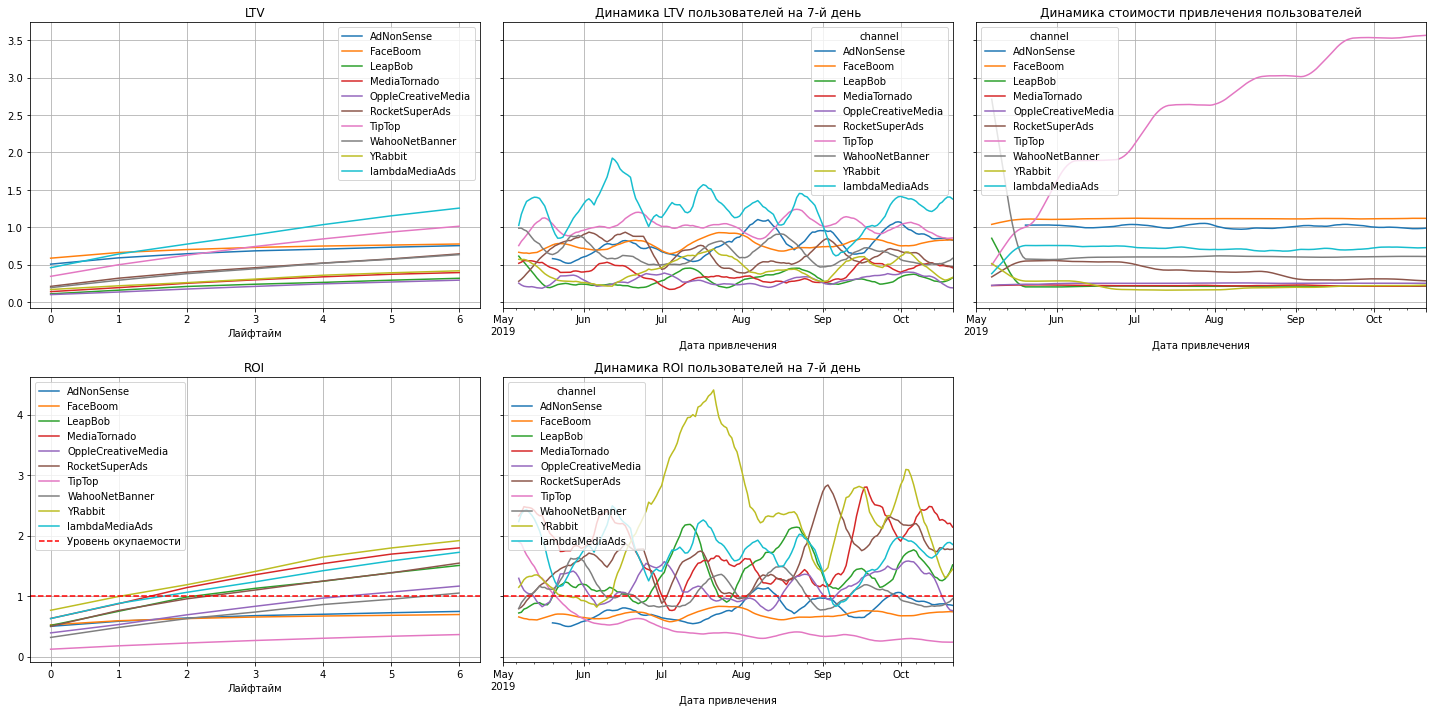

In [40]:
plot_ltv_roi (ltv, ltv_history, roi, roi_history, horizon, window=7)

**Вывод:**
- похоже обнаружена вероятная дыра в бюджете, которая и топит проект - это затраты на TipTop, которые в итоге стали в 3,5 раза выше ближайших "конкурентов", ROI при этом еле-еле достигает 40%;
- другие "жирные" источники привлечения - FaceBoom и AdNonSense тоже не покраывают затрат на привлечение;
- обратить внимание на расширение вложений в привлечение пользователей стоит на каналах YRabbit, MediaTornado и lambdaMediaAds (лидер по LTV);
- стоимость затрат по каналам практически не изменялась, за исключением TipTop, основной рост затрат связан именно с этой платформой.

Расчитаем конверсию и удержание по странам.

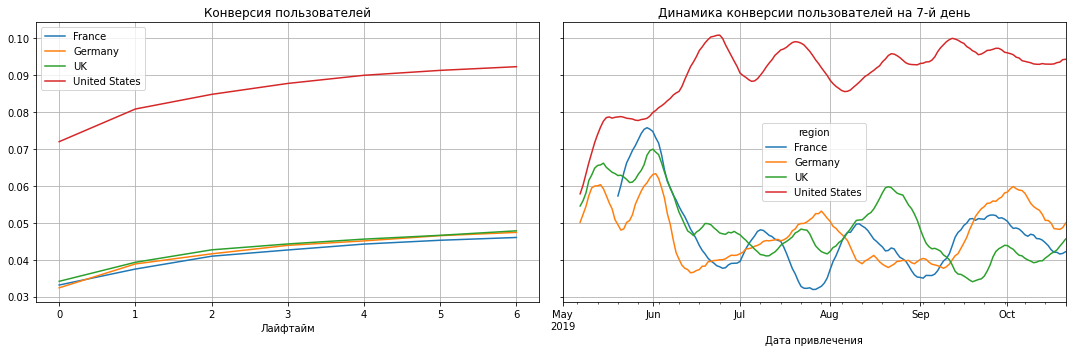

In [41]:
#конверсия по странам
conversion_raw, conversion, conversion_history = get_conversion(
    non_organic_profiles,
    orders,
    observation_date,
    horizon,
    dimensions=['region'],
    ignore_horizon=False,
)
conversion_history = filter_data(conversion_history, window=14)
plot_conversion(conversion, conversion_history, horizon, window=7)

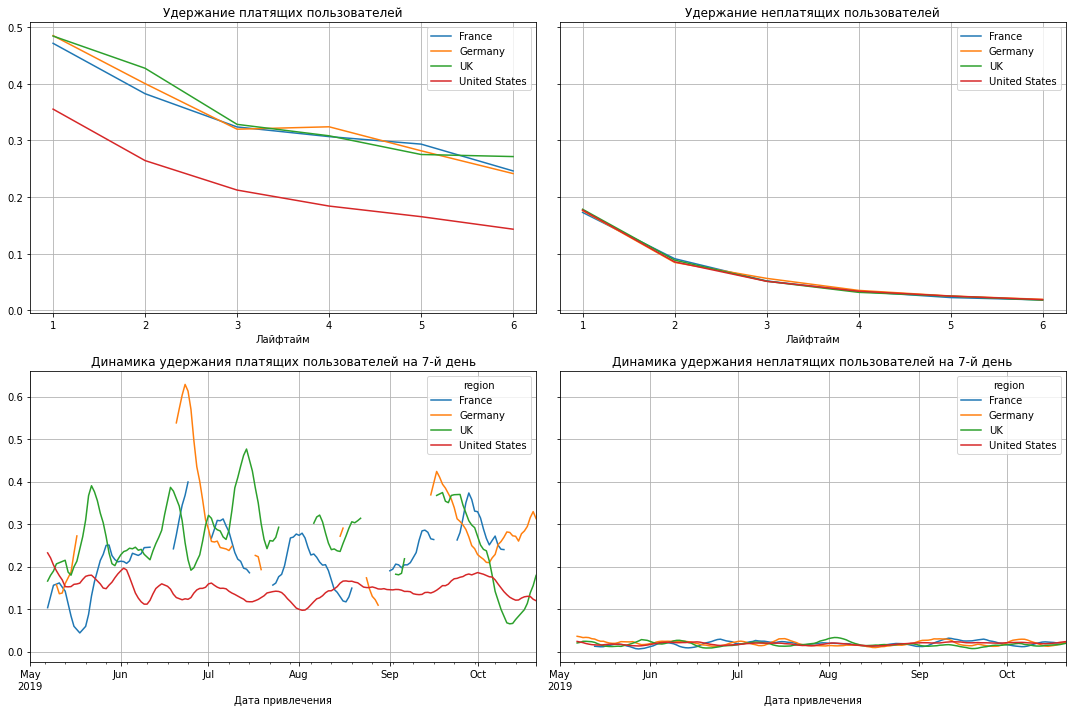

In [42]:
#удержание по странам
retention_raw, retention, retention_history = get_retention(
    non_organic_profiles,
    visits,
    observation_date,
    horizon,
    dimensions=['region'],
    ignore_horizon=False,
)
retention_history = filter_data(retention_history, window=7)
plot_retention(retention, retention_history, horizon, window=7)

Расчитаем конверсию и удержание по каналам.

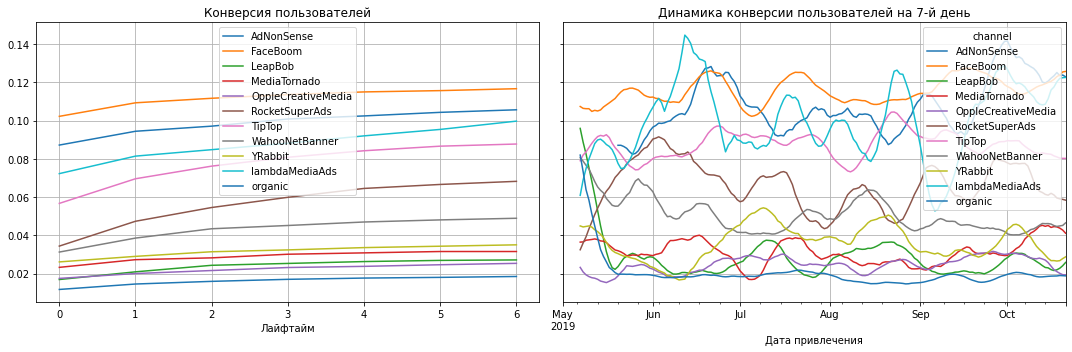

In [43]:
#конверсия по каналам
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon,
    dimensions=['channel'],
    ignore_horizon=False,
)
conversion_history = filter_data(conversion_history, window=14)
plot_conversion(conversion, conversion_history, horizon, window=7)

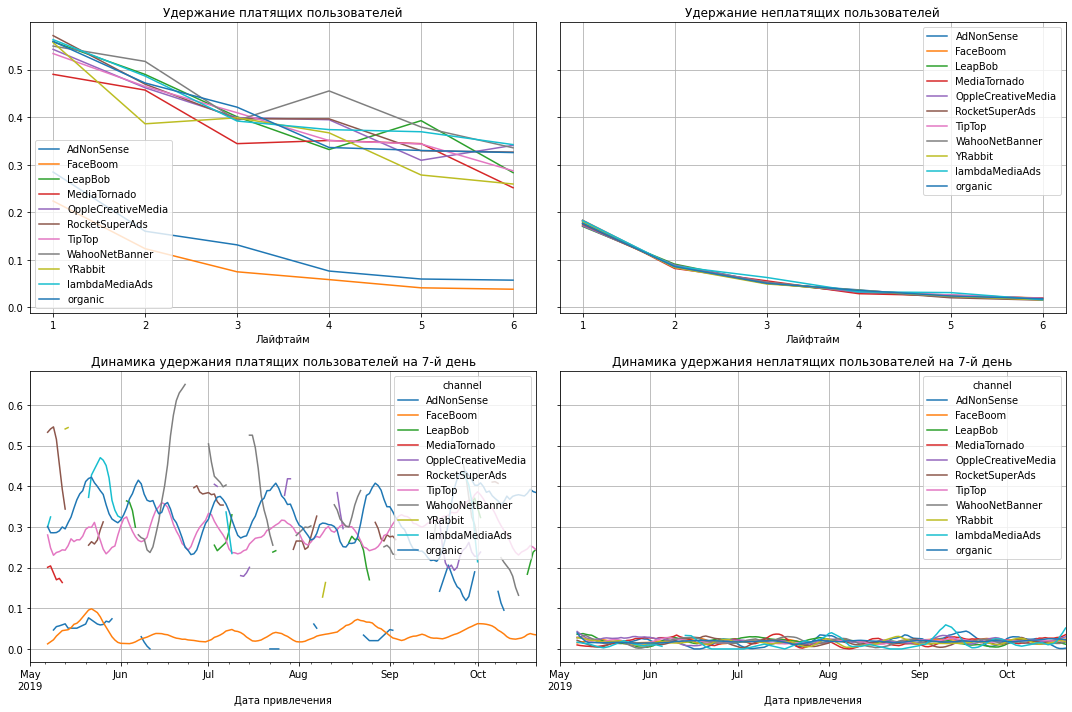

In [44]:
#удержание по каналам
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon,
    dimensions=['channel'],
    ignore_horizon=False,
)
retention_history = filter_data(retention_history, window=7)
plot_retention(retention, retention_history, horizon, window=7)

**Вывод:**
- с пользователями из США отмечается интересная особенность, очень высокая конверсия, возможно, за счет более высоких вложений в привлечение, однако ужасная динамика удержания. Данная особенность должна стать точкой роста.
- FaceBoom и AdNonSense характеризиуются той же особенностью - высокая конверсия, но низкое удержания; 
- TipTop при хорошей конверсии, показывает среднее удержания, однако, с учетом цены, показатели не настолько хорошие;
- снова lambdaMediaAds дает интересную картину - хорошая конверсия и удержание, при этом низкая цена.

# Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

**ВЫВОДЫ:**
- загружены библиотеки необходимые для работы и датасеты из для анализа;
- названия колонок приведены к нижнему регистру и из названий удалены пробелы, форматы колонок с датами приведены к формату datetime;
- заданы функции для расчета метрик и построения графиков;
- с большим отрывом количество платящих пользователей находятся в США. C точки зрения устройств такого отрыва нет, наибольшее количество платящих пользователей пользуются Айфонами, у других устройств практически паритет;
- лучшим каналом с точки зрения количества пользователей является FaceBoom. Так же в топе находится TipTop и пользователей пришедших органически;
- общие траты на рекламу составили 105497 у.е. С большим отрывом больше всего денег в качестве источника продвижения потратили на TipTop, он же явился и самым дорогим с точки зрения затрат на привлечение 1 покупателя. В 1,5 раза меньше затратили на FaceBoom, при этом стоимость затрат на пользователя близка к медиане. На остальные источники затратили от ~1000 до ~5000, стоимость привленчения 1 покупателя составила около 9;
- ROI ни разу за весь период не достигал 1, инвестиции в рекламу не окупаются, резкий рост затрат отметим с июня и если ROI на 7-й день был хоть немного положительным и было от чего отталкиваться, то дальше - пропасть;
- наибольшая стоимость привлечения, как и LTV наблюдается у пользователей iOS/MacOS, но затраты на привлечение все же несоизмеримо больше, что дает худшую окупаемость среди устройств;
- меньше всего вклыдываются в привлечение пользователей PC, при этом окупаемость уже близка к еденице. С учетом базы пользователей, стоит больше внимания уделить привлечению платящей аудитории данной платформы;
- основные затраты на рекламу связаны с США, что, в целом, логично, в данном регионе наибольшее количество активных пользователей. Однако данные инвестиции в страну не окупаются, необходимо пересматривать рекламные бюджеты и их реализацию; 
- с пользователями из США отмечается интересная особенность, очень высокая конверсия, возможно, за счет более высоких вложений в привлечение, однако ужасная динамика удержания. Данная особенность должна стать точкой роста.
- европейские страны показывают схожие показатели, лучшей по LTV и ROI является Британия, если есть какие то особенности продвижения на данном рынке, стоит обратить на них внимание и реализовать в остальных регионах;
- Франция хоть и находится на последнем месте по LTV, однако доходность вложений в рекламу выше 1;
- похоже обнаружена вероятная дыра в бюджете, которая и топит проект - это затраты на TipTop, которые в итоге стали в 3,5 раза выше ближайших "конкурентов", ROI при этом еле-еле достигает 40%;
- другие "жирные" источники привлечения - FaceBoom и AdNonSense тоже не покраывают затрат на привлечение;
- обратить внимание на расширение вложений в привлечение пользователей стоит на каналах YRabbit, MediaTornado и lambdaMediaAds (лидер по LTV);
- стоимость затрат по каналам практически не изменялась, за исключением TipTop, основной рост затрат связан именно с этой платформой;
- FaceBoom и AdNonSense характеризиуются той же особенностью - высокая конверсия, но низкое удержания; 
- TipTop при хорошей конверсии, показывает среднее удержания, однако, с учетом цены, показатели не настолько хорошие;
- снова lambdaMediaAds дает интересную картину - хорошая конверсия и удержание, при этом низкая цена.

*РЕКОМЕНДАЦИИ:*
- в первую очередь - обратить внимание на затраты на привлечение пользователей с канала TipTop, вложений в него в разы больше, доходность при этом минимальная, а конверсия и удержание - средние по больнице. Данные бюджеты стоит либо перераспределить между другими каналами привлечения, либо обратить внимание на кейс lambdaMediaAds, почему данный канал привлечения дает такие LTV и Conversion выше чем TipTop, удержание на уровне, затраты при этом раз в 5 меньше;
- так же необходимо усиливать позицию в Европе, как с точки зрения расширения пользовательской базы в уже сушествующих странах, так и экспансию в остальные страны региона;
- что касается региона США стоит обратить внимание на удержание платящих пользователей данного региона, в данном регионе хорошая конверсия, осталось только удержать эту базу;
- ну и, наконец, обратить внимание на пользователей PC, с учетом базы пользователей, возможно, привлечение платящей базы в данной платформе тоже является точкой роста.